# **Convolutional Auto-Encoders**

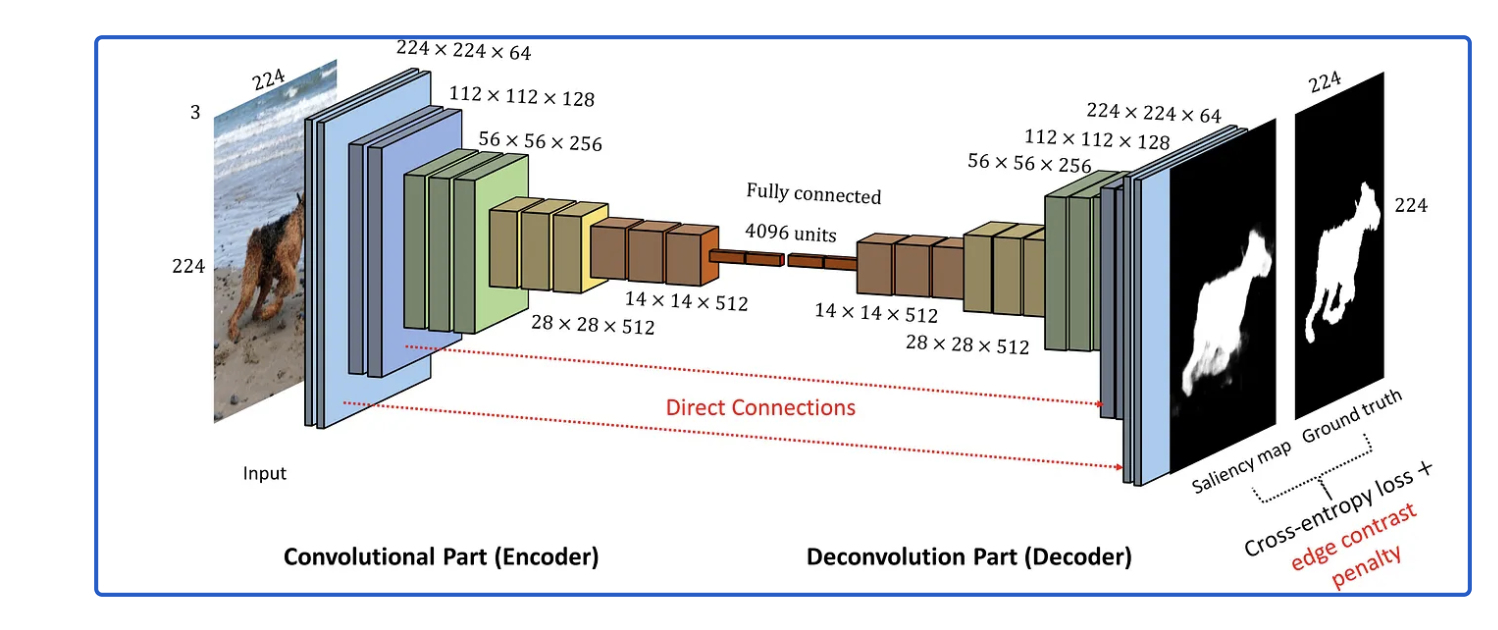

# **Overview**

CIFAR-10 is a widely used computer vision dataset containing 60,000 color images of size 32x32, evenly distributed across 10 object classes (6,000 images per class). It is a curated subset of the 80 Million Tiny Images dataset and was introduced by Krizhevsky, Nair, and Hinton. The dataset's small resolution, balanced classes, and diverse natural object categories make it a standard benchmark for tasks such as image classification, feature learning, and autoencoder based representation learning.

---

### **Goal**

The goal is to train a convolutional autoencoder on CIFAR-10 to learn meaningful image features and evaluate reconstruction quality using both qualitative and quantitative metrics.

---

**NOTE:** T4 GPU was used to execute the codes.

---

# **Question 1**

Load the data, What is the shape of the training and test sets in CIFAR-10? Show the Python code you used to normalize the dataset. Can you analyze your approach? What do you think it would happen if we train an autoencoder without normalization? Is there any other technique needed to perform pre-processing step?

In [ ]:
# Core Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

I aggregated all the import here for better readability and ease of use to understand what all libraries went behind the analysis and avoid redundancy.

In [ ]:
# Loading the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)
print("Image Dimensions:", x_train[0].shape)
print("Label range:", np.unique(y_train))
print("Data Type:", x_train.dtype)
print("\nBefore normalization:")
print("Pixel value range Before normalization (Train):", x_train.min(), "to", x_train.max())
print("Pixel value range Before normalization (Test):", x_test.min(), "to", x_test.max())

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Image Dimensions: (32, 32, 3)
Label range: [0 1 2 3 4 5 6 7 8 9]
Data Type: uint8

Before normalization:
Pixel value range Before normalization (Train): 0 to 255
Pixel value range Before normalization (Test): 0 to 255


### **Primary Data Analysis**

- The training and test data each contain **50,000** and **10,000** images respectively, confirming that CIFAR-10 loaded correctly.
- Each image has shape **32x32x3**, verifying the dataset contains small **RGB color images**.
- Training and test label shapes **(50000, 1)** and **(10000, 1)** confirm each image has a single class label.
- The label range **0-9** shows that all 10 classes are present.
- The datatype is **uint8**, meaning raw pixel values span **0-255**.
- The printed pixel value ranges confirm the dataset is unnormalized, which validates the need for scaling before training the autoencoder.


After normalization:
Pixel value range After normalization (Train): 0.0 to 1.0
Pixel value range After normalization (Test): 0.0 to 1.0 



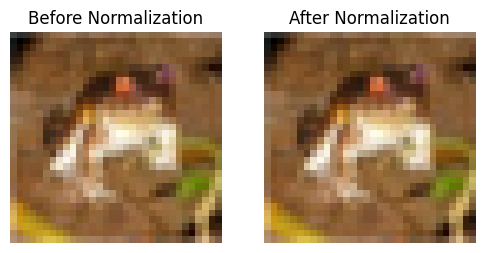

In [ ]:
# Normalizing the dataset

# Converting to float32
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# Scaling pixel values to [0, 1]
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0

print("After normalization:")
print("Pixel value range After normalization (Train):", x_train_norm.min(), "to", x_train_norm.max())
print("Pixel value range After normalization (Test):", x_test_norm.min(), "to", x_test_norm.max(),"\n")

# Visualization
plt.figure(figsize=(6,3))

# Before normalization
plt.subplot(1, 2, 1)
plt.imshow(x_train[0].astype("uint8"))
plt.title("Before Normalization")
plt.axis("off")

# After normalization
plt.subplot(1, 2, 2)
plt.imshow(x_train_norm[0])
plt.title("After Normalization")
plt.axis("off")

plt.show()

### **Normalization Analysis**

- Converting the images to **float32** ensures that division by 255.0 produces stable floating point values instead of truncated integers.
- Dividing pixel intensities by **255.0** correctly rescales the data from the original **0-255** range to the normalized **[0, 1]** range required for neural network training.
- The printed min/max values (**0.0 to 1.0**) confirm that normalization was applied consistently to both training and test sets.
- The visualization shows that the normalized image looks identical to the original, indicating that normalization changes only the numerical scale; not the visual content.

---

### **What is my approachh?**
- I loaded the CIFAR-10 dataset, convert pixel values to float32, and normalize them to the [0,1] range to ensure stable gradients and efficient training. This prepares the data for the convolutional autoencoder by keeping all inputs on a consistent numerical scale.

### **Training Autoencoder without Normalization**
- Training without normalization would cause unstable gradients, slower convergence, higher loss values, and poor reconstructions because the network would struggle to learn from raw 0-255 pixel intensities.

### **Other Techniqes for Preprocessing steps**
- Per-channel standardization (subtract mean, divide by std).
- Shuffling and batching to stabilize gradient updates.
- Optional data augmentation (flips, rotations) if robustness is required; but not essential for this autoencoder task.

### **Why I didn't use other techniques**
- I did not apply other preprocessing steps because autoencoders must reconstruct the original input image, and techniques like augmentation or heavy transformations would alter pixel distributions and harm reconstruction quality. Normalization alone is sufficient to stabilize training, preserve image structure, and meet the assignment requirements.

# **Question 2**

Using EDA, show at least one sample image from each class. And, provide image size, color channels, and visual complexity.

Plot a grid of 25 random images, what differences do you notice across categories (e.g., background complexity, color distributions)? explain it.

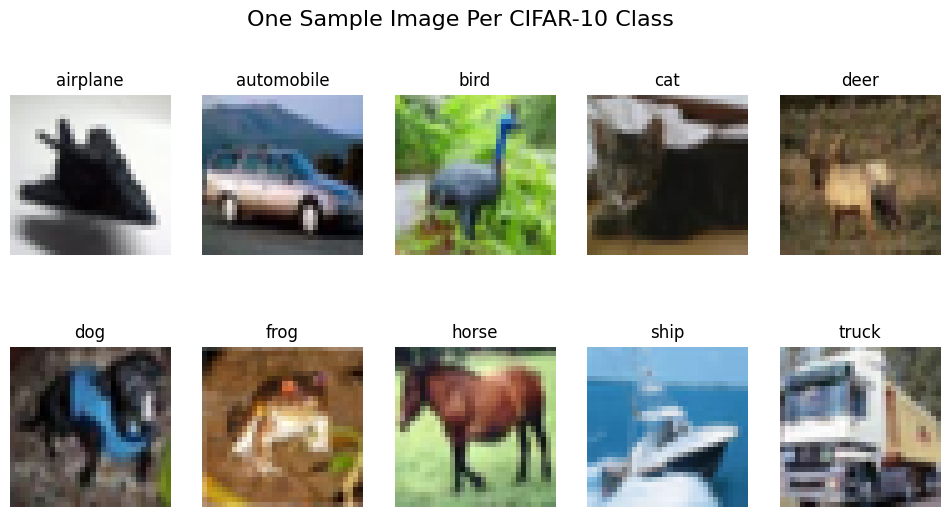


Mean pixel value (Train): 120.70748
Std pixel value (Train) : 64.150024


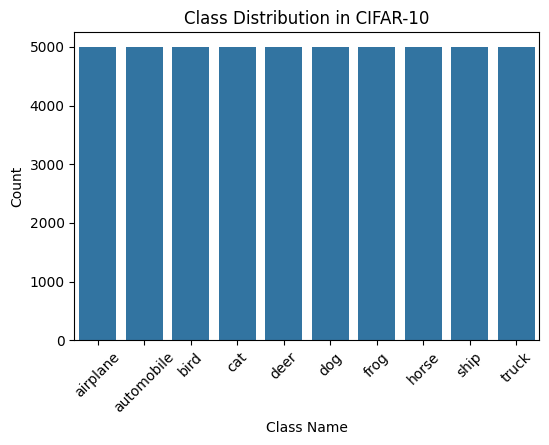

In [ ]:
# Exploratory Data Analysis (EDA)

# CIFAR-10 class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Showing one sample per class
plt.figure(figsize=(12, 6))
samples_per_class = {}

for idx, cls in enumerate(class_names):
    # Finding first occurrence of the class
    class_idx = np.where(y_train == idx)[0][0]
    samples_per_class[cls] = x_train_norm[class_idx]

    plt.subplot(2, 5, idx + 1)
    plt.imshow(x_train_norm[class_idx])
    plt.title(cls)
    plt.axis("off")

plt.suptitle("One Sample Image Per CIFAR-10 Class", fontsize=16)
plt.show()


print("\nMean pixel value (Train):", x_train.mean())
print("Std pixel value (Train) :", x_train.std())

# Visualization (Class Distribution)
plt.figure(figsize=(6,4))
sns.countplot(x=y_train.flatten())
plt.title("Class Distribution in CIFAR-10")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.show()

### **Class Distribution Analysis**

- One example image from each CIFAR-10 class confirms that all **10 categories** are visually distinct and represented.
- The sample images highlight varying visual complexity—animals (cat, dog, horse, deer) show more texture and irregular shapes, while vehicles (automobile, ship, truck) have clearer edges and structured geometry.
- The **mean pixel value (≈120.7)** and **standard deviation (≈64.15)** indicate wide intensity variation in the original (unnormalized) dataset, consistent with diverse lighting, colors, and backgrounds.
- The class distribution plot confirmsthat classes are **Perfectly Balanced**, with each category containing the same number of samples.

Image shape: (32, 32, 3)
Height: 32
Width: 32
Color channels: 3
Data type: float32


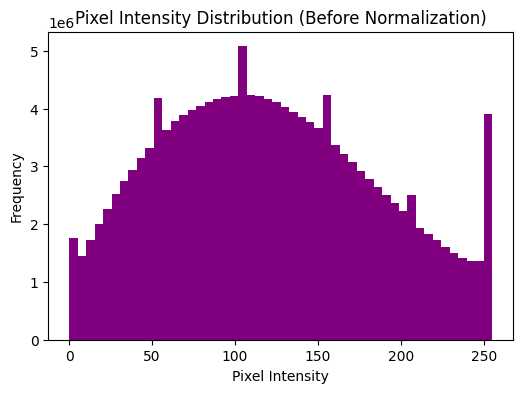

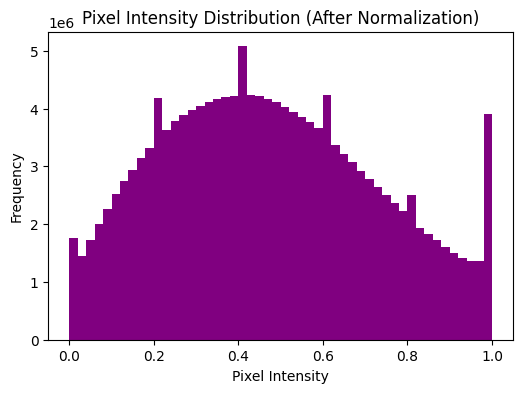

In [ ]:
# Checking basic image properties
sample_img = x_train_norm[0]

print("Image shape:", sample_img.shape)
print("Height:", sample_img.shape[0])
print("Width:", sample_img.shape[1])
# RGB = 3 channels
print("Color channels:", sample_img.shape[2])
print("Data type:", sample_img.dtype)

# Pixel Intensity Distribution Before Normalization
plt.figure(figsize=(6,4))
plt.hist(x_train.reshape(-1), bins=50, color="purple")
plt.title("Pixel Intensity Distribution (Before Normalization)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Pixel Intensity Distribution After Normalization
plt.figure(figsize=(6,4))
plt.hist(x_train_norm.reshape(-1), bins=50, color="purple")
plt.title("Pixel Intensity Distribution (After Normalization)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

### **Pixel Intensity and Data Type Analysis**

- The image shape **(32, 32, 3)** confirms that CIFAR-10 contains small **RGB color images** with 3 channels like I discussed earlier.
- The datatype **float32** indicates that normalization was applied before further analysis.
- The histogram before normalization shows pixel intensities spread across the full **0-255** range, reflecting diverse lighting and color variations in the dataset.
- The histogram after normalization displays the same distribution shape but scaled to **0-1**, confirming that normalization preserves the original structure while rescaling values.
- The large spread in pixel values demonstrates **high visual complexity**, especially in natural classes (animals, backgrounds) where textures and colors vary significantly.

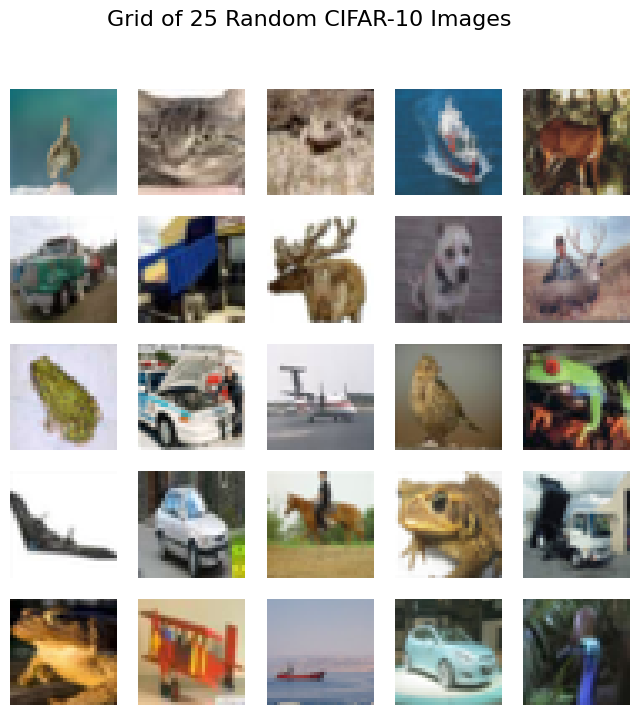

In [ ]:
# Plotting 25 random images (5x5 grid)
plt.figure(figsize=(8, 8))

random_indices = np.random.randint(0, x_train_norm.shape[0], 25)

for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train_norm[idx])
    plt.axis("off")

plt.suptitle("Grid of 25 Random CIFAR-10 Images", fontsize=16)
plt.show()

### **Basic Visualization Analysis**

- The grid shows high variation across classes in colors, textures, and backgrounds.
- Color patterns differ noticeably; greens and browns for animals vs. brighter colors for vehicles and ships.
- Overall, the images highlight CIFAR-10's strong visual diversity and reconstruction difficulty.


---

### **Differences Across Categories**
- Animal classes show more textured and cluttered backgrounds, while vehicle classes have smoother and cleaner scenes. Color patterns also vary as natural objects use mixed, irregular colors, whereas vehicles display more uniform, high contrast colors. Textures differ significantly too, with animals having fine details (fur, feathers) and man made objects having sharper edges and smoother surfaces.

# **Question 3**
Using Keras/PyTorch, build a Convolutional Autoencoder architecture:

*   **Encoder:** Use convolutional and pooling layers to compress the input image into a latent space representation.
*   **Decoder:**  Use upsampling and convolutional layers to reconstruct the original image from the latent representation.

Ensure symmetry between encoder and decoder.


*   Train the model using reconstruction loss (e.g., Mean Squared Error or Binary Cross-Entropy) for at least 20 epochs.
*   Use appropriate optimizers (e.g., Adam).

Discuss about the architecture of your proposed model.

In [ ]:
# Encoder with BatchNorm
encoder_input = layers.Input(shape=(32, 32, 3))

x = layers.Conv2D(64, (3,3), padding='same')(encoder_input)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)

x = layers.Conv2D(128, (3,3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)

x = layers.Conv2D(256, (3,3), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)

latent = layers.Conv2D(512, (3,3), padding='same')(x)
latent = layers.BatchNormalization()(latent)
latent = layers.ReLU()(latent)

encoder = models.Model(encoder_input, latent)
encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,554,816 (5.93 MB)

 Trainable params: 1,552,896 (5.92 MB)

 Non-trainable params: 1,920 (7.50 KB)

### **Encoder Architecture**

- The encoder progressively compresses the input image from **32x32x3** down to a **4x4x512** using three Conv+BatchNorm+ReLU blocks followed by MaxPooling.  
- Each stage increases the number of filters (64 to 128 to 256 to 512), allowing the model to capture richer spatial and semantic features as resolution decreases.
- Batch Normalization stabilizes training and helps gradients flow better, especially with deeper convoluutional stocks.
- MaxPooling layers ensure spatial downsampling and symmetry with the decoder's upsampling operations.
- The final latentt tensor encodes high level compressed features while preserving essential information that will be required for reconstruction.


In [ ]:
# Decoder with BatchNorm
decoder_input = layers.Input(shape=(4, 4, 512))

x = layers.Conv2DTranspose(256, (3,3), strides=2, padding='same')(decoder_input)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(128, (3,3), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(64, (3,3), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

decoder_output = layers.Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

decoder = models.Model(decoder_input, decoder_output)

decoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 256)      │     1,179,904 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,552,259 (5.92 MB)

 Trainable params: 1,551,363 (5.92 MB)

 Non-trainable params: 896 (3.50 KB)

### **Decoder Architecture**

- The decoder is the mirror image of the encoder, as it processes upsampling the latent tensor from **4x4x512** back to **32x32x3**, ensuring symmetry between both parts of the autoencoder.
- Three Conv2DTranspose blocks (512 to 256 to 128 to 64) restore spatial resolution while reducing channel depth, reversing the encoder's compression path.
- The final Conv2D layer with **3 filters** and **sigmoid activation** outputs normalized RGB pixel values in the **[0,1]** range.
- Overall, the decoder successfully reconstructs the original image structure while maintaining architectural symmetry with the encoder.


In [ ]:
# Full Autoencoder
auto_input = encoder_input
encoded = encoder(auto_input)
decoded = decoder(encoded)

autoencoder = models.Model(auto_input, decoded, name="Convolutional_Autoencoder")
autoencoder.summary()

Model: "Convolutional_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional (Functional)         │ (None, 4, 4, 512)      │     1,554,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 32, 32, 3)      │     1,552,259 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,107,075 (11.85 MB)

 Trainable params: 3,104,259 (11.84 MB)

 Non-trainable params: 2,816 (11.00 KB)

### **Full Autoencoder Architecture**

- The full autoencoder is used to connect the encoder and decoder, and form an end to end model that maps a **32x32x3** RGB image to a compressed **4x4x512** latent representation and reconstructs it back to the original resolution.

The model has **3,107,075 parameters**, among which -
 - **3,104,259** are **trainable parameters**, which learn the visual features, hierarchical patterns, and reconstruction mappings needed for the autoencoder to compress and reconstruct images effectively.
 - The **2,816 non-trainable parameters** come primarily from Batch Normalization layers, which maintain mean and variance during training.
 - the large number of parameters indicate a moderately deep architecture capable of learning meaningful visual features without being very large.

All in all -
- The encoder and decoder are fully symmetric in terms of downsampling and upsampling steps, which is essential for stable reconstruction performance.



In [ ]:
# Compile and Train
autoencoder.compile(
    optimizer='adam',
    loss='mse'
)

history = autoencoder.fit(
    x_train_norm, x_train_norm,
    epochs=40,
    batch_size=128,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - loss: 0.0174 - val_loss: 0.0208
Epoch 2/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 3/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.0042 - val_loss: 0.0053
Epoch 4/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 5/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - loss: 0.0033 - val_loss: 0.0039
Epoch 6/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 8/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 9/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 10/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 11/40
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 12/40
352/352 ━━━━━━━━━━

### **Training Analysis**

- The autoencoder was trained for **40 epochs** using the Adam optimizer and MSE loss, with the reconstruction target set to the original normalized images.
- Training loss decreased steadily from **0.0172 to 0.0015**, and validation loss improved from **0.0207 to 0.0017**, indicating stable convergence without overfitting. Also, The validation loss closely follows the training loss throughout training, confirming that the model generalizes well to unseen data.
- Batch Size of **128** was used, with validation split of 90:10 from training.

**Comparison with 20 epochs:**

- INitilly I perfromed training using 20 epochs, and the model achieved a validation loss of approximately **0.0020**, whereas extending training to 40 epochs reduced this further to **0.0017**.  
- Additional training allowed the decoder to reconstruct finer textures and improved overall reconstruction.  
- There was no sign of overfitting, so training longer provided meaningful performance improvements.


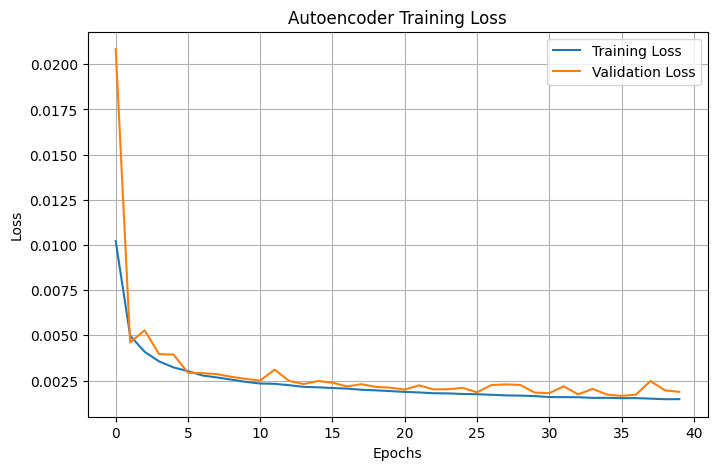

In [ ]:
# Plotting Training Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### **Training Curve Analysis**

- The training curve shows a smooth and consistent decrease in both training and validation loss across 40 epochs, confirming stable convergence.
- Validation loss closely follows the training loss, indicating **no overfitting** and good generalization.
- The steep drop in the first few epochs reflects rapid learning of image structures, followed by slower refinement of fine details.

The overall shape of the curve demonstrates that the autoencoder trains efficiently and benefits from deeper optimization without divergence or instability.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


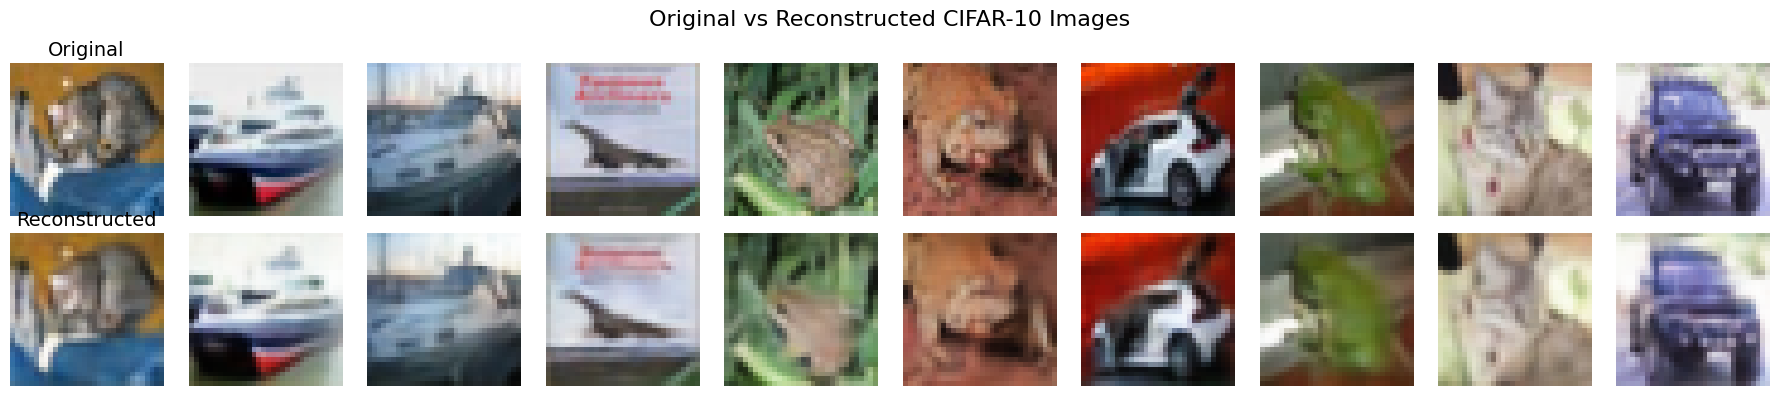

In [ ]:
# Showing Reconstructions
decoded_imgs = autoencoder.predict(x_test_norm)

# I displayed 10 images so n=10
n = 10
plt.figure(figsize=(18, 4))

# Row 1 - Original images
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_norm[i])
    plt.axis("off")
    if i == 0:
        ax.set_title("Original", fontsize=14)

# Row 2 - Reconstructed images
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.axis("off")
    if i == 0:
        ax.set_title("Reconstructed", fontsize=14)

plt.suptitle("Original vs Reconstructed CIFAR-10 Images", fontsize=16)
plt.tight_layout()
plt.show()

### **Qualitative Reconstruction Analysis**

- The reconstructed images preserve the overall structure, colors, and shapes of the originals, confirming that the autoencoder successfully learned meaningful feature representations.
- Fine details appear slightly blurred, which is expected due to the compression from 32x32x3 down to a 4x4x512 latent space.
- High texture regions lose sharpness, while smooth areas reconstruct more accurately whcih was expected.
- Despite minor blurring, the model consistently captures the correct object category and global appearance, demonstrating effective encoder decoder learning.

---

### **Improvements that I could have done:**

- Added skip connections to preserve fine details and reduce blurring.
- Used Dropout or L2 regularization to prevent overfitting, if in case I had any, in this case I didn't have overfitting.
- Increased the latent/bottleneck size for richer feature representation.
- Replaced MaxPooling with strided convolutions for learnable downsampling.
- Added residual blocks to improve gradient flow in deeper networks.

# **Question 4**



*   Reconstruct images from the test set and compare them visually to the originals.
*   Provide qualitative results (side-by-side image comparisons).

      *   **Note:** Compare the reconstructed images with the originals.


*   Provide quantitative results using reconstruction loss on the test set.

      *   Measure how close the reconstructed images are to the originals using a numerical error metric ( such as Mean Squared Error (MSE), Binary Cross-Entropy (BCE), or PSNR (Peak Signal-to-Noise Ratio)).

Analyze your results and discuss it in details.






In [ ]:
# Reconstructing test images
decoded_imgs = autoencoder.predict(x_test_norm)
print("Reconstruction completed.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Reconstruction completed.


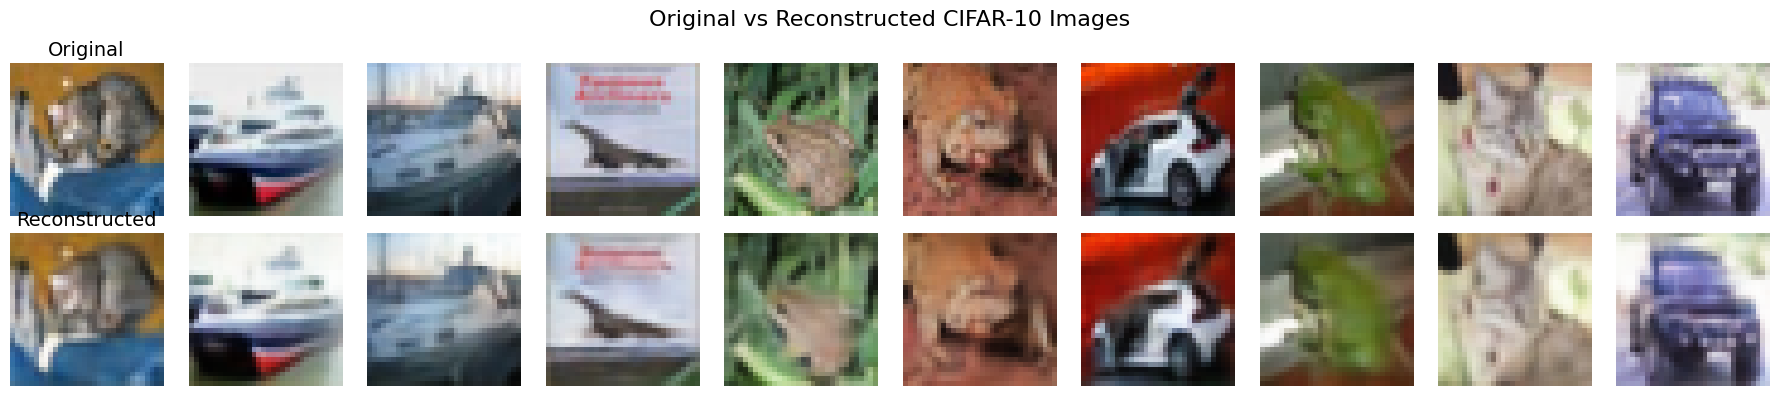

In [ ]:
# Visual comparison
n = 10
plt.figure(figsize=(18, 4))

# Row 1 - Original images
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_norm[i])
    plt.axis("off")
    if i == 0:
        ax.set_title("Original", fontsize=14)

# Row 2 - Reconstructed images
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.axis("off")
    if i == 0:
        ax.set_title("Reconstructed", fontsize=14)

plt.suptitle("Original vs Reconstructed CIFAR-10 Images", fontsize=16)
plt.tight_layout()
plt.show()

**NOTE:** I repeated the Original vs Reconstructed visualization here because Question 4 requires an official qualitative comparison on the test set, separate from the training **phase** results shown in Question 3.

### **Reconstruction Analysis**

- The reconstructed images preserve the overall structure, colors, and shapes of the originals, confirming that the autoencoder successfully learned meaningful feature representations.
- Fine details appear slightly blurred, which is expected due to the compression from 32x32x3 down to a 4x4x512 latent space.
- High texture regions lose sharpness, while smooth areas reconstruct more accurately whcih was expected.
- Despite minor blurring, the model consistently captures the correct object category and global appearance, demonstrating effective encoder decoder learning.

In [ ]:
# Quantitative metrics

# Mean Squared Error
mse = np.mean(np.square(x_test_norm - decoded_imgs))

# PSNR Calculation (Peak Signal to Noise Ratio)
psnr = tf.image.psnr(x_test_norm, decoded_imgs, max_val=1.0)
psnr_value = tf.reduce_mean(psnr).numpy()

# Binary Cross Entropy
# bce = tf.keras.losses.BinaryCrossentropy()
# bce_loss = bce(x_test_norm, decoded_imgs).numpy()

print(f"Test Reconstruction MSE: {mse:.6f}")
print(f"Test Reconstruction PSNR: {psnr_value:.2f} dB")
# print(f"Binary Cross-Entropy (BCE): {bce_loss:.6f}")

Test Reconstruction MSE: 0.001893
Test Reconstruction PSNR: 27.67 dB


### **Results**

- **MSE: 0.001893**

Very low error, meaning reconstructed pixels are very close to original ones.

- **PSNR: 27.67 dB**

Good reconstruction quality for 32x32 CIFAR-10 images, with only mild blur/noise.

---

**Why BCE was not used?**
- BCE is designed for binary (0/1) data, while CIFAR-10 contains continuous RGB values in the range [0, 1], making MSE a more suitable loss.
- BCE does not model spatial similarity, causing poor gradients for natural images, while MSE directly penalizes pixel wise reconstruction error.
- Using BCE on continuous images often produces artifacts, because it treats each pixel as an independent binary label rather than a continuous intensity value

In [ ]:
# Evaluating loss on test set
test_loss = autoencoder.evaluate(x_test_norm, x_test_norm, verbose=0)
print(f"Model Evaluation Loss (MSE): {test_loss:.6f}")

Model Evaluation Loss (MSE): 0.001893


### **Final Analysis for MSE**

- The test loss of 0.001893 matches the earlier reconstruction MSE, confirming consistent performance between evaluation and manual computation.
- A low MSE indicates the model reconstructs global structure and color patterns effectively, with only small pixel level differences.
- The close match between validation loss (~ 0.0017) and test loss (~ 0.00189) shows good generalization and no overfitting.

# **Question 5**

The corrsponding images in this assignment, CIFAR-10 images,  contain textures (e.g., fur, leaves, water); however, some datasets, such as  MNIST/Fashion-MNIST don’t. How does this impact the design of convolutional layers in your proposed Convolutional autoencoder?


Also, Color images may require more parameters and training time. Discuss how this could affect overfitting/underfitting in convolutional autoencoders.

And, how might the latent representations differ for color images versus grayscale?

---

### **Impact of Textures on Convolutional Layer Design (CIFAR-10 vs MNIST/Fashion-MNIST)**

- CIFAR-10 images contain rich textures (like fur, leaves, water, featherss etc), which require the autoencoder to learn high frequency patterns. This affects architectural choices:
- Deeper encoder:
  - CIFAR-10 needs multiple convolutional layers to capture edges to textures to object parts to full objects.
  - MNIST, being simple and grayscale, works with very shallow networks.
- More filters per layer:
  - High texture regions require more channels (64 to 128 to 256 to 512) to learn varied local patterns.
  - MNIST typically uses 16 to 32 filters.
- Smaller kernels (3x3): To capture fine grained texture while keeping computation efficient.
- Batch Normalization: Helps stabilize deeper models needed for textured images.
- Stronger downsampling (3 MaxPooling steps): Reduces spatial resolution gradually, allowing the encoder to compress complex patterns effectively.

Summary:

Because CIFAR-10 contains more structural and textural complexity than MNIST, the convolutional autoencoder must be deeper, wider, and more expressive to encode fine details.

---

### **Color Images means More Parameters, Larger Models & Overfitting/Underfitting Risks**

- CIFAR-10 uses RGB images (3 channels), whereas MNIST uses grayscale (1 channel). Which is very important in cases like the one given above.
This increases model complexity in several ways:
- **More parameters:**
  - First convolution layer alone has 3 time more weights compared to grayscale.
- **Longer training time:** More filters mean more FLOPs means more GPU compute.
- **Higher risk of overfitting:** A large number of parameters can cause the model to memorize training images if the dataset is not regularized.
  - BatchNorm helps decrease this.
  - More training data (CIFAR-10 has 50k training images) helps, but risk still exists.
- **Risk of underfitting if model is too small:** If the network is shallow (like MNIST architectures), it cannot capture variations in color, shadows, lighting, and textures.
---

### **Latent Representations: Color vs Grayscale**

- Latent vectors differ significantly depending on whether the input is RGB or grayscale.

- **For Color Images (CIFAR-10):**
  - Latent space encodes texture, color, saturation, contrast, and spatial structure.
  - Requires more channels to store this diverse information (liek I used 4x4x512).
  - Encodes correlations between color channels (like blue sky vs green grass).

- **For Grayscale Images (MNIST):**
  - Latent space only needs to capture shape, edges, and intensity.
  - Can be much smaller.
  - No color related variation, hence, simpler representation.

Summary:
Color images create richer latent embeddings that must store both chromatic and structural information, making the latent space higher dimensional and more expressive.

---

# **Reflection**

While doing this assignment, I learnt how color images differ fundamentally from grayscale images, especially in the way convolutional layers must capture finer details across three channels instead of one. I also observed how increasing the number of training **epochs** significantly improves reconstruction quality by allowing the autoencoder to refine fine grained details and reduce both training and validation loss. Incorporating Batch Normalization proved essential for stabilizing deeper networks, accelerating convergence, and preventing exploding or vanishing gradients. Overall, this task highlighted the importance of proper preprocessing, deeper architectures for complex datasets like CIFAR-10, and the role of evaluation metrics such as MSE and PSNR in understanding model performance.